In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [8]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [10]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


## Tarea 1

In [14]:
# remove first column
boston_df = boston_df[boston_df.columns[1:]]

In [18]:
boston_df.head(10)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [20]:
boston_df.describe(include='all')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Tarea 2

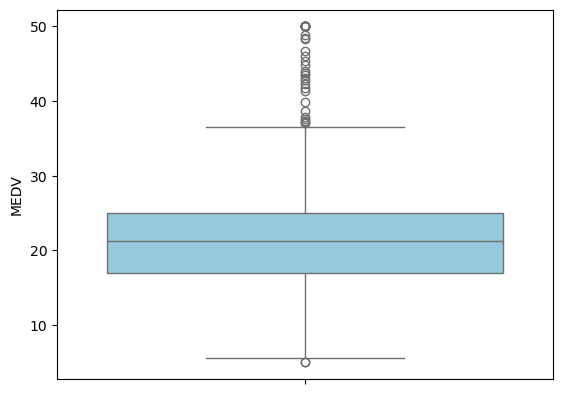

In [23]:
# Boxplot para MEDV con color personalizado
ax = sns.boxplot(y='MEDV', data=boston_df, color='skyblue')
plt.show()


Podemos ver que el valor mediano en el boxplot anterior está ligeramente por encima de 20 y también podemos observar algunos valores atípicos.


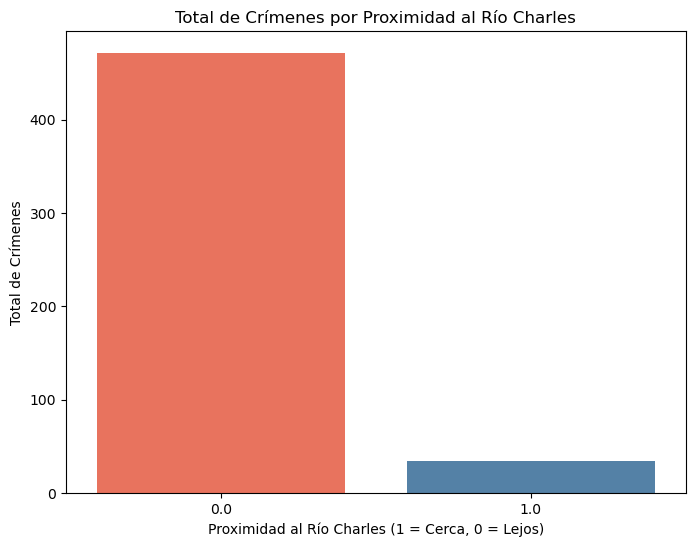

In [31]:
# Datos agregados para el río Charles
chas_agg = boston_df.groupby('CHAS')['CRIM'].count().reset_index().rename(columns={'CRIM': 'TOTAL'})

# Definir una paleta de colores personalizada
custom_palette = ["#FF6347", "#4682B4"]

# Gráfico de barras con colores vivos usando la paleta personalizada
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="CHAS", y='TOTAL', hue="CHAS", data=chas_agg, palette=custom_palette, dodge=False, legend=False)

# Añadir títulos y etiquetas
plt.title('Total de Crímenes por Proximidad al Río Charles')
plt.xlabel('Proximidad al Río Charles (1 = Cerca, 0 = Lejos)')
plt.ylabel('Total de Crímenes')

# Mostrar el gráfico
plt.show()


C:\Users\Work\AppData\Local\Temp\ipykernel_14848\1732529000.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='AGE_group', y='MEDV', data=boston_df, palette='Set2')


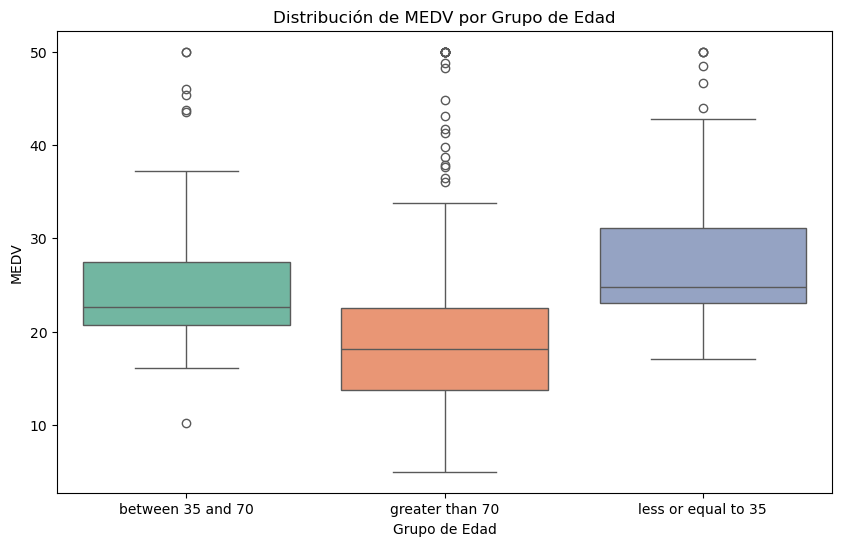

In [33]:
# Crear grupos de edad
boston_df.loc[boston_df.AGE <= 35, 'AGE_group'] = 'less or equal to 35'
boston_df.loc[(boston_df.AGE > 35) & (boston_df.AGE <= 70), 'AGE_group'] = 'between 35 and 70'
boston_df.loc[boston_df.AGE > 70, 'AGE_group'] = 'greater than 70'

# Gráfico de boxplot con colores vivos
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='AGE_group', y='MEDV', data=boston_df, palette='Set2')

# Añadir títulos y etiquetas
plt.title('Distribución de MEDV por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('MEDV')

# Mostrar el gráfico
plt.show()

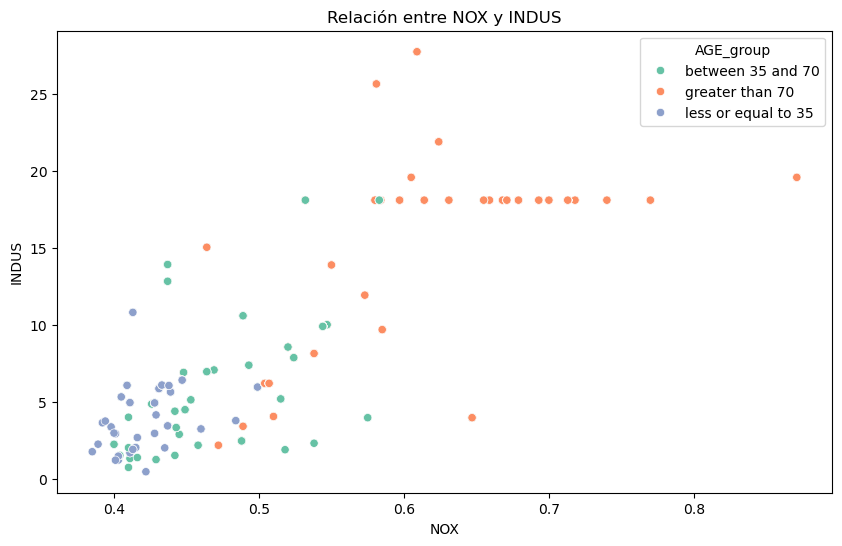

In [35]:
# Scatter plot con colores vivos
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df, hue='AGE_group', palette='Set2')

# Añadir títulos y etiquetas
plt.title('Relación entre NOX y INDUS')
plt.xlabel('NOX')
plt.ylabel('INDUS')

# Mostrar el gráfico
plt.show()

Podemos decir que las dos variables podrían tener una correlación potencial.

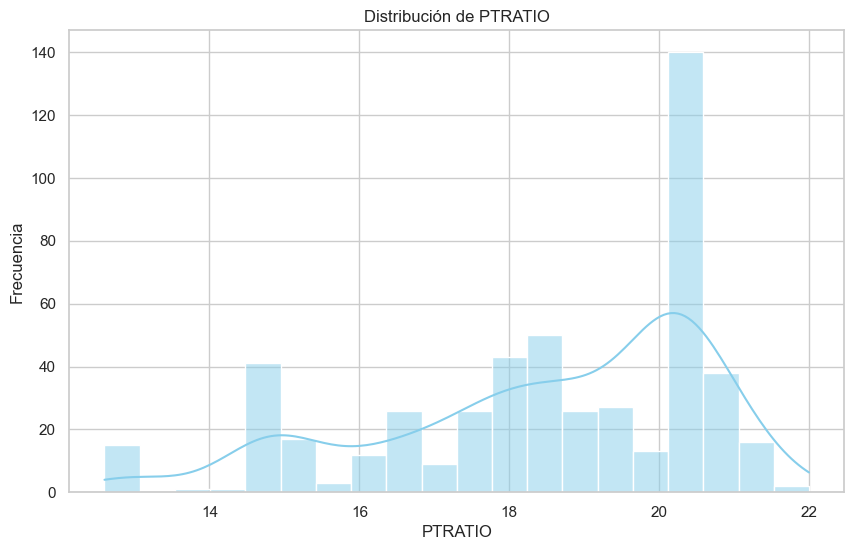

In [38]:
# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Crear un histograma más atractivo para PTRATIO
plt.figure(figsize=(10, 6))
ax = sns.histplot(boston_df['PTRATIO'], bins=20, kde=True, color='skyblue')

# Añadir títulos y etiquetas
plt.title('Distribución de PTRATIO')
plt.xlabel('PTRATIO')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

## Tarea 3

## Prueba t
Planteamiento de la hipótesis

**𝐻0**: no hay diferencia en el valor mediano de las casas delimitadas por el río Charles

**𝐻1**: hay una diferencia en el valor mediano de las casas delimitadas por el río Charles

In [43]:
scipy.stats.levene(boston_df['MEDV'],
                   boston_df['CHAS'], center='mean')

# since the p-value is less than 0.05 we will reject the null hypothesis and conclude there is difference between median value of houses bounded by the Charles river

LeveneResult(statistic=532.6811164157666, pvalue=5.402535119732986e-95)

## ANOVA

H 0: no hay diferencia en el valor mediano de las casas para cada proporción de casas ocupadas por sus propietarios antes de 1940

𝐻1: hay una diferencia en el valor mediano de las casas para cada proporción de casas ocupadas por sus propietarios antes de 1940


In [46]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df['MEDV'], boston_df['AGE'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

# since the p-value is less than 0.05 we will reject the null hypothesis and conclude there is difference in median value for each proportion o owner occupied prior to 1940

F_Statistic: 1223.1740271875933, P-Value: 3.20946197250671e-176


## Pearson

H0: no hay relación entre las concentraciones de óxido nítrico y la proporción de acres de negocios no comerciales por ciudad

𝐻1: hay una relación entre las concentraciones de óxido nítrico y la proporción de acres de negocios no comerciales por ciudad


In [49]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# the p-value is less than 0.05 and therefore we will reject the null hypothesis and we can conclude that there is a relationship between the 2 variables

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

## Regresion

H0: no hay impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston en el valor mediano de las casas ocupadas por sus propietarios

𝐻1: hay impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston en el valor mediano de las casas ocupadas por sus propietarios

In [53]:
# Definir las variables
## X representa las variables independientes (en este caso, la distancia ponderada a los centros de empleo)
X = boston_df['DIS']
## y es la variable dependiente (el valor mediano de las casas)
y = boston_df['MEDV']

# Añadir un término de intersección (beta_0) al modelo
X = sm.add_constant(X)

# Crear y ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Realizar predicciones
predicciones = modelo.predict(X)

# Mostrar un resumen de los resultados del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        01:17:19   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0